# Análisis y Predicción de Ventas en una Tienda de Retail

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/retail_sales_dataset.csv")
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


## Transformación de Datos

### Crear nuevas columnas

In [167]:
# Se crea la columna de rango de edad
df['Rango_de_edad'] = df['Age'].transform(lambda x: 'Menor o igual a 30 años' if x >= 20 and x <= 30 else 'Mayor a 30 años')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
 9   Rango_de_edad     1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [169]:
# Se crea una columna de venta normalizada
max_venta = df['Total Amount'].max()
min_venta = df['Total Amount'].min()
df['Venta_normalizada'] = df['Total Amount'].transform(lambda x: (x - min_venta) / (max_venta - min_venta))
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291


In [170]:
# Se tiene los datos estadisticos de la columna Total Amount
df['Total Amount'].describe()

count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64

### Clasifica los datos

In [171]:
# Se agrega una clasificacion por tipo de venta segun su importe
ventas = df['Total Amount']

def clasificar(ventas):
    clasificacion = []
    for venta in ventas:
        if venta <= 60:
            clasificacion.append('Bajo')
        elif venta > 60 and venta < 900:
            clasificacion.append('Medio')
        else:
            clasificacion.append('Alto')
    return clasificacion

df['Clasificacion'] = clasificar(ventas)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio


In [172]:
# Se cuenta la cantidad de registros para cada clasificicacion
df['Clasificacion'].value_counts()

Clasificacion
Medio    474
Alto     264
Bajo     262
Name: count, dtype: int64

## Agrupación y Agregación

### Agrupación por múltiples columnas

In [173]:
# Se agrupa el importe total vendido por genero y tipo de producto
suma_por_gender_y_producto = df.groupby(['Gender','Product Category'])['Total Amount'].sum()
suma_por_gender_y_producto

Gender  Product Category
Female  Beauty              74830
        Clothing            81275
        Electronics         76735
Male    Beauty              68685
        Clothing            74305
        Electronics         80170
Name: Total Amount, dtype: int64

Las mujeres compran mas ropa y los hombres articulos electronicos

In [174]:
# Se agrupa el importe medio por rango edad y clasificacion de importe vendido
df.groupby(['Rango_de_edad','Clasificacion'])['Total Amount'].mean()

Rango_de_edad            Clasificacion
Mayor a 30 años          Alto             1302.487562
                         Bajo               42.954545
                         Medio             213.067568
Menor o igual a 30 años  Alto             1282.539683
                         Bajo               42.968750
                         Medio             224.134615
Name: Total Amount, dtype: float64

En promedio los mayores a 30 años gastan más que los menores a 30 años

### Aplicar funciones de agregación

In [175]:
# Se ven los datos estadisticos con las funciones de agregación
df['Total Amount'].agg(['mean','sum','count','var','std'])

mean        456.000000
sum      456000.000000
count      1000.000000
var      313597.347347
std         559.997632
Name: Total Amount, dtype: float64

In [176]:
# Se ven los datos estadisticos por tipo de clasificacion ALTO
clasificacion_alto = df.loc[df['Clasificacion'] == 'Alto']
clasificacion_alto['Total Amount'].describe()

count     264.000000
mean     1297.727273
std       394.248751
min       900.000000
25%      1000.000000
50%      1200.000000
75%      1500.000000
max      2000.000000
Name: Total Amount, dtype: float64

In [177]:
# Se ven los datos estadisticos por tipo de clasificacion MEDIO
clasificacion_medio = df.loc[df['Clasificacion'] == 'Medio']
clasificacion_medio['Total Amount'].describe()

count    474.000000
mean     215.495781
std      167.057981
min       75.000000
25%      100.000000
50%      120.000000
75%      300.000000
max      600.000000
Name: Total Amount, dtype: float64

In [178]:
# Se ven los datos estadisticos por tipo de clasificacion BAJO
clasificacion_bajo = df.loc[df['Clasificacion'] == 'Bajo']
clasificacion_bajo['Total Amount'].describe()

count    262.000000
mean      42.958015
std       12.951803
min       25.000000
25%       30.000000
50%       50.000000
75%       50.000000
max       60.000000
Name: Total Amount, dtype: float64

## Análisis Personalizado con apply

### Función personalizada

In [179]:
# Convertir la Serie en un DataFrame (la serie es mi resultado de agrupacion con groupby)
# Se agrega una columna de % del total de cada agrupacion
df_suma = suma_por_gender_y_producto.reset_index()

df_suma['Porcentaje'] = df_suma['Total Amount'].transform(lambda x: x / (x.sum()) * 100 )
df_suma = df_suma.sort_values(by='Porcentaje', ascending=False)
df_suma

,Gender,Product Category,Total Amount,Porcentaje
1,Female,Clothing,81275,17.823465
5,Male,Electronics,80170,17.581140
2,Female,Electronics,76735,16.827851
0,Female,Beauty,74830,16.410088
4,Male,Clothing,74305,16.294956
3,Male,Beauty,68685,15.062500


In [180]:
# Se ve la media por cada grupo
mean_per_group = df.groupby('Clasificacion')['Total Amount'].mean()
mean_per_group

Clasificacion
Alto     1297.727273
Bajo       42.958015
Medio     215.495781
Name: Total Amount, dtype: float64

In [181]:
# Se agrega una columna de media segun el grupo al que le corresponde cada fila
df['Media por Grupo'] = df['Clasificacion'].map(mean_per_group)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781


In [182]:
# Se agrega una columna de desviacion, restando el importe total por la media
df['Desviacion'] = df['Total Amount'] - df['Media por Grupo']
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781


In [183]:
# 2da manera de calcular la desviacion sobre la media de cada grupo
# Se crea una funcion que realice el calculo y luego se agrega la columna
def calculo_desviacion(row):
    mean_value = mean_per_group[row['Clasificacion']]
    return row['Total Amount'] - mean_value

df['Desviacion2'] = df.apply(calculo_desviacion, axis=1)
df


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion,Desviacion2
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273,-297.727273
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015,-12.958015
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219,284.504219
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985,7.041985
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781,-125.495781
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781


## GRAFICOS

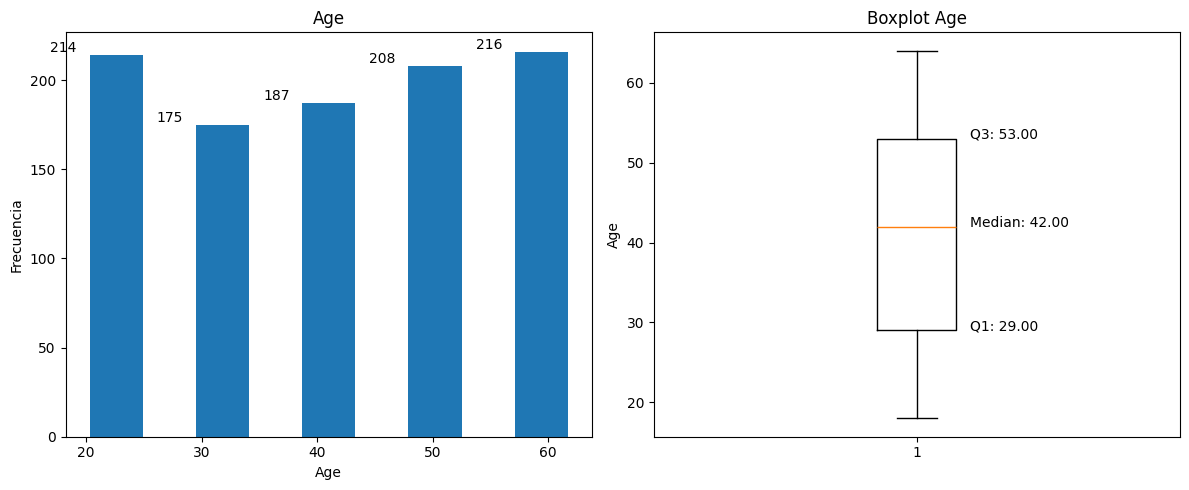

In [184]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Age']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=5, rwidth=0.5)  # Histograma
axs[0].set_xlabel("Age")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Age")  # Título del gráfico

# Etiquetas en el histograma
for count, x in zip(n, bins):
    axs[0].text(x + 0.05, count, str(int(count)), ha='center', va='bottom')

# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Age")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Age")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

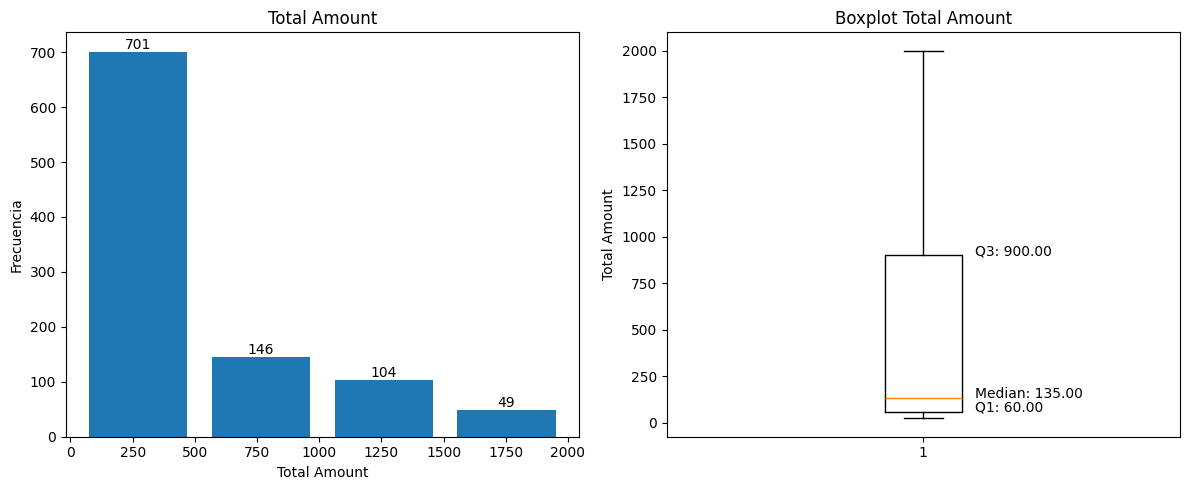

In [185]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Total Amount']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=4, rwidth=0.8)  # Histograma
axs[0].set_xlabel("Total Amount")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Total Amount")  # Título del gráfico

# Etiquetas en el histograma
for count, left, right in zip(n, bins[:-1], bins[1:]):  # bins[:-1] y bins[1:] recorren cada par de bordes
    x = (left + right) / 2  # Centro de la barra
    axs[0].text(x, count, str(int(count)), ha='center', va='bottom')  # Etiqueta en el centro de la barra


# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Total Amount")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Total Amount")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

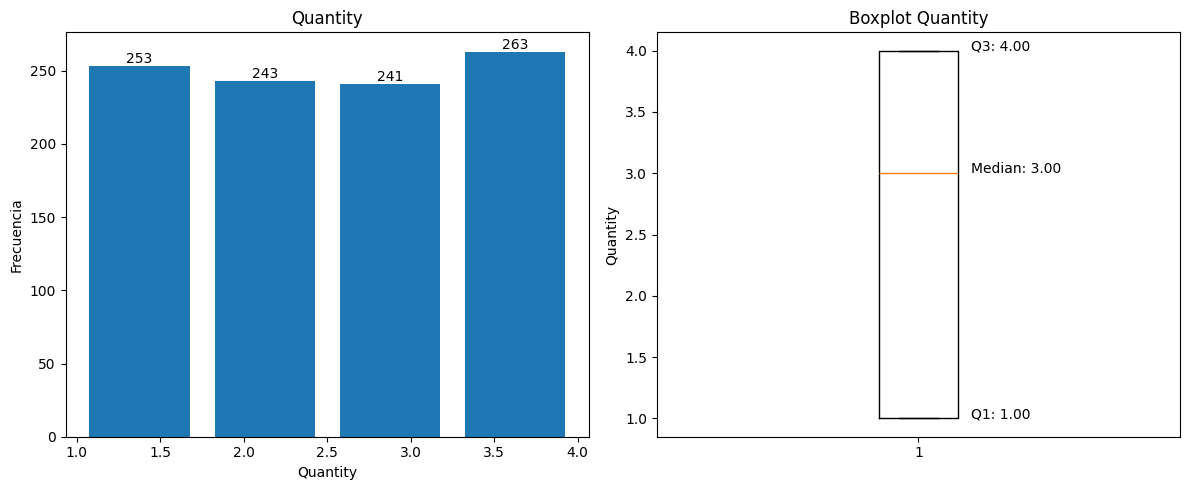

In [186]:
# Crear subgráficas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Histograma
datos = df['Quantity']  # Se cargan los datos
n, bins, patches = axs[0].hist(datos, bins=4, rwidth=0.8)  # Histograma
axs[0].set_xlabel("Quantity")  # Etiqueta del eje X
axs[0].set_ylabel("Frecuencia")  # Etiqueta del eje Y
axs[0].set_title("Quantity")  # Título del gráfico

# Etiquetas en el histograma
for count, left, right in zip(n, bins[:-1], bins[1:]):  # bins[:-1] y bins[1:] recorren cada par de bordes
    x = (left + right) / 2  # Centro de la barra
    axs[0].text(x, count, str(int(count)), ha='center', va='bottom')  # Etiqueta en el centro de la barra


# Boxplot
axs[1].boxplot(datos)  # Boxplot
axs[1].set_ylabel("Quantity")  # Etiqueta del eje Y
axs[1].set_title("Boxplot Quantity")  # Título del gráfico

# Calcular los cuartiles
Q1 = datos.quantile(0.25)  # Primer cuartil
Q2 = datos.median()  # Mediana (segundo cuartil)
Q3 = datos.quantile(0.75)  # Tercer cuartil

# Etiquetas de datos para los cuartiles
axs[1].text(1.1, Q1, f'Q1: {Q1:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q2, f'Median: {Q2:.2f}', fontsize=10, ha='left')
axs[1].text(1.1, Q3, f'Q3: {Q3:.2f}', fontsize=10, ha='left')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()

In [187]:
# Convierte la columna a datetime y luego extrae solo el año y el mes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce').dt.to_period('M')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Rango_de_edad,Venta_normalizada,Clasificacion,Media por Grupo,Desviacion,Desviacion2
0,1,2023-11,CUST001,Male,34,Beauty,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781
1,2,2023-02,CUST002,Female,26,Clothing,2,500,1000,Menor o igual a 30 años,0.493671,Alto,1297.727273,-297.727273,-297.727273
2,3,2023-01,CUST003,Male,50,Electronics,1,30,30,Mayor a 30 años,0.002532,Bajo,42.958015,-12.958015,-12.958015
3,4,2023-05,CUST004,Male,37,Clothing,1,500,500,Mayor a 30 años,0.240506,Medio,215.495781,284.504219,284.504219
4,5,2023-05,CUST005,Male,30,Beauty,2,50,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05,CUST996,Male,62,Clothing,1,50,50,Mayor a 30 años,0.012658,Bajo,42.958015,7.041985,7.041985
996,997,2023-11,CUST997,Male,52,Beauty,3,30,90,Mayor a 30 años,0.032911,Medio,215.495781,-125.495781,-125.495781
997,998,2023-10,CUST998,Female,23,Beauty,4,25,100,Menor o igual a 30 años,0.037975,Medio,215.495781,-115.495781,-115.495781
998,999,2023-12,CUST999,Female,36,Electronics,3,50,150,Mayor a 30 años,0.063291,Medio,215.495781,-65.495781,-65.495781


In [188]:
# Se preparan los datos para generar un grafico de lineas
ventas_por_periodo = df.groupby('Date')['Total Amount'].sum()
periodo = ventas_por_periodo.index
venta_total = ventas_por_periodo.values
print(periodo)
print(venta_total)

PeriodIndex(['2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
             '2024-01'],
            dtype='period[M]', name='Date')
[35450 44060 28990 33870 53150 36715 35465 36960 23620 46580 34920 44690
  1530]


In [189]:
# Convierte el PeriodIndex en formato datetime
periodo = periodo.to_timestamp()
periodo

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

(array([19358., 19417., 19478., 19539., 19601., 19662., 19723.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

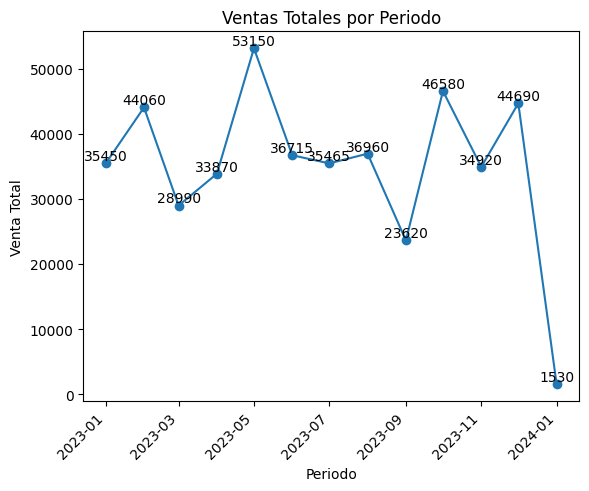

In [190]:
# Acá se genera el gráfico utilizando plot, con los datos obtenidos en el fragmento de codigo anterior
# Crear el gráfico de línea
plt.plot(periodo, venta_total, marker='o')  # marker='o' añade puntos en cada dato

# Etiquetas de datos
for x, y in zip(periodo, venta_total):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')  # Ajusta fontsize para el tamaño de las etiquetas

# Etiquetas de los ejes y título
plt.ylabel("Venta Total")
plt.xlabel("Periodo")
plt.title("Ventas Totales por Periodo")

# Rotar y ajustar etiquetas en el eje X
plt.xticks(rotation=45, ha='right')  # Rotación de 45 grados y alineación a la derecha

Se ve que el pico de ventas fue en mayo de 2023 y una caida importante en enero 2024 pero se debe a que aun no se tiene los datos de el mes completo

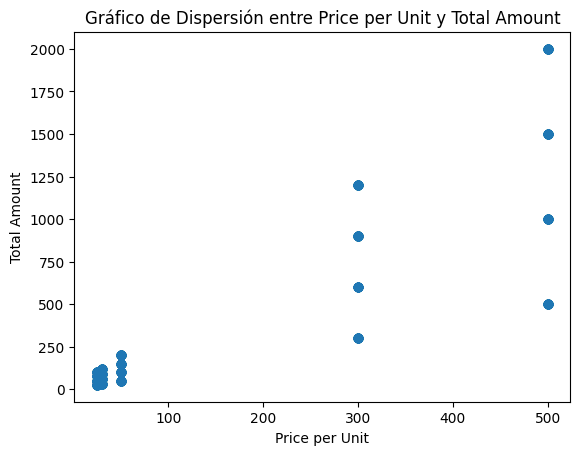

In [191]:
# Crear el gráfico de dispersión
plt.scatter(df['Price per Unit'], df['Total Amount'], alpha=0.6)  # alpha ajusta la transparencia de los puntos

# Etiquetas y título
plt.xlabel("Price per Unit")
plt.ylabel("Total Amount")
plt.title("Gráfico de Dispersión entre Price per Unit y Total Amount")

# Mostrar gráfico
plt.show()

In [192]:
# Se calcula la correlación para confirmar
correlation = df['Price per Unit'].corr(df['Total Amount'])
print("Correlación:", correlation)

Correlación: 0.8519248403554038


Se ve una correlación positva, a medida que el precio sube, también el total de venta. Acá se aprecia que la mayoría igual se encuentran con precios debajo de los 100 y ventas debajo del total de 250

In [193]:
df_num = df[['Age','Quantity','Price per Unit','Total Amount']]
df_num

,Age,Quantity,Price per Unit,Total Amount
0,34,3,50,150
1,26,2,500,1000
2,50,1,30,30
3,37,1,500,500
4,30,2,50,100
...,...,...,...,...
995,62,1,50,50
996,52,3,30,90
997,23,4,25,100
998,36,3,50,150


In [194]:
# Cálculo de la correlación de Pearson
correlation_matrix = df_num.corr(method='pearson')
print(correlation_matrix)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023737       -0.038423     -0.060568
Quantity       -0.023737  1.000000        0.017501      0.373707
Price per Unit -0.038423  0.017501        1.000000      0.851925
Total Amount   -0.060568  0.373707        0.851925      1.000000


In [195]:
# Cálculo de la correlación de Spearman
spearman_corr = df_num.corr(method='spearman')
print(spearman_corr)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.023472       -0.037966     -0.037864
Quantity       -0.023472  1.000000        0.024014      0.474103
Price per Unit -0.037966  0.024014        1.000000      0.857439
Total Amount   -0.037864  0.474103        0.857439      1.000000


In [196]:
# Cálculo de la correlación de Kendall
kendall_corr = df_num.corr(method='kendall')
print(kendall_corr)

                     Age  Quantity  Price per Unit  Total Amount
Age             1.000000 -0.017853       -0.027979     -0.026288
Quantity       -0.017853  1.000000        0.019210      0.401932
Price per Unit -0.027979  0.019210        1.000000      0.724707
Total Amount   -0.026288  0.401932        0.724707      1.000000


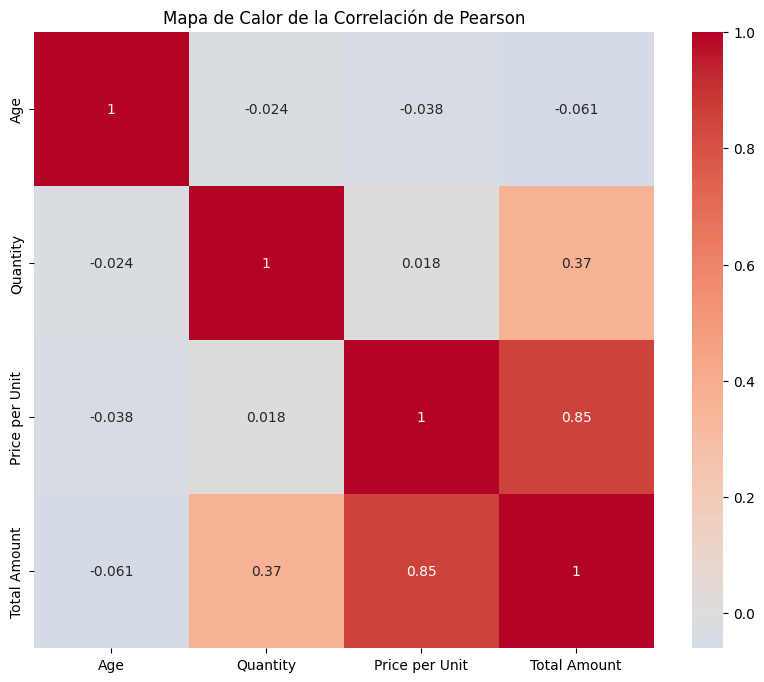

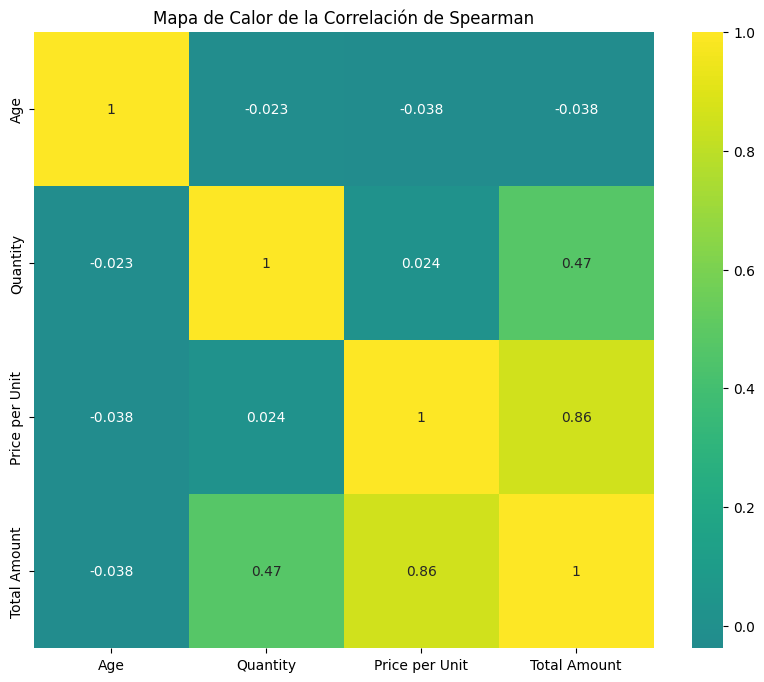

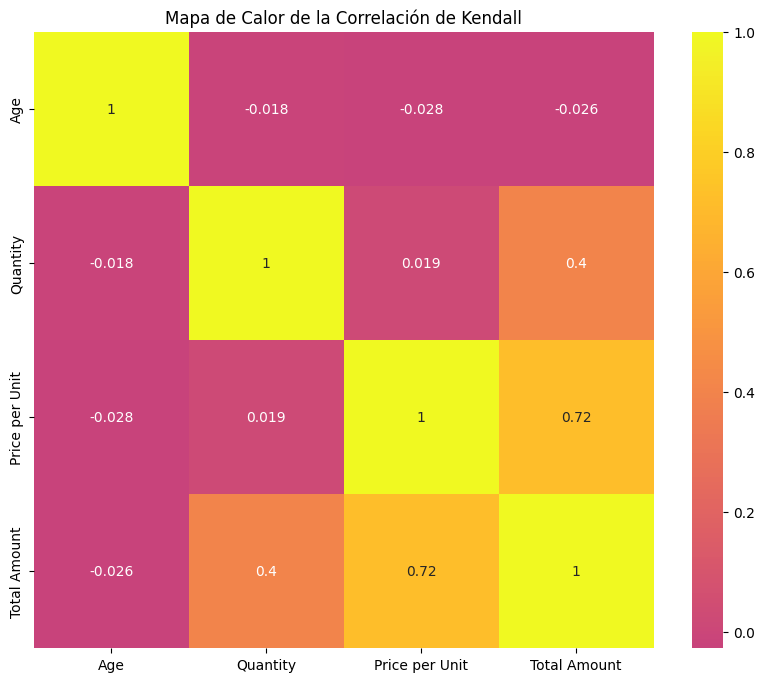

In [197]:
import seaborn as sns

# Crear un mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0)
plt.title("Mapa de Calor de la Correlación de Spearman")
plt.show()

# Crear un mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0)
plt.title("Mapa de Calor de la Correlación de Kendall")
plt.show()

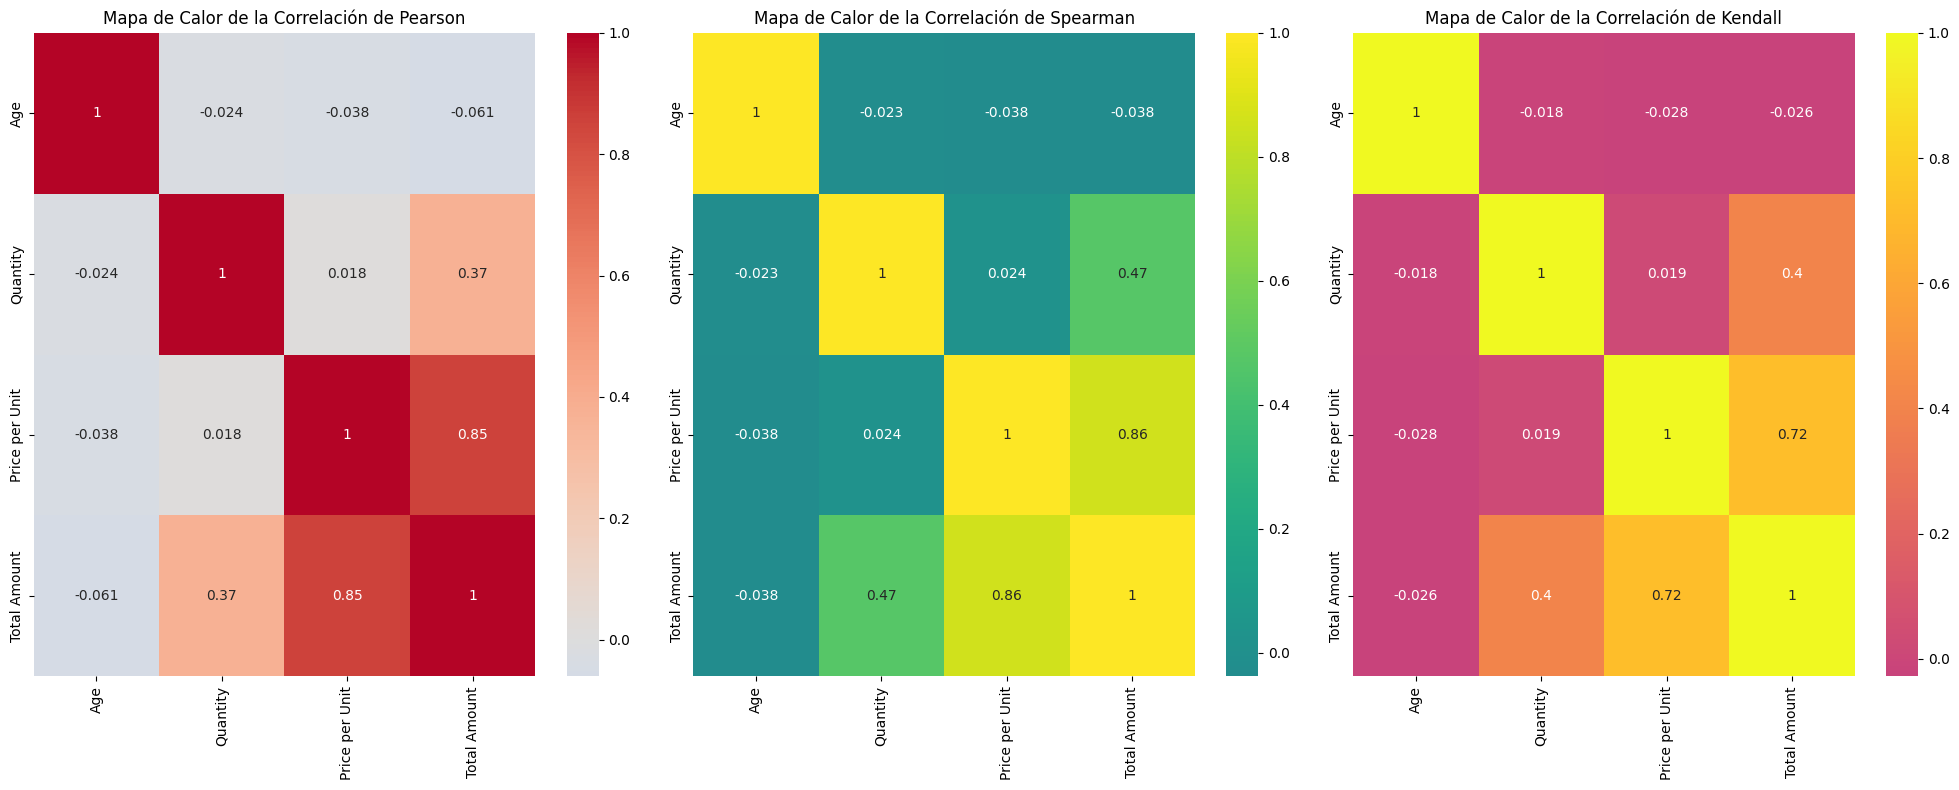

In [198]:
# Crear figura y ejes para subplots
fig, axs = plt.subplots(1,3, figsize=(20,8))

# Crear un mapa de calor para la matriz de correlación de Pearson
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axs[0])
axs[0].set_title("Mapa de Calor de la Correlación de Pearson")


# Crear un mapa de calor para la matriz de correlación de Spearman
sns.heatmap(spearman_corr, annot=True, cmap='viridis', center=0, ax=axs[1])
axs[1].set_title("Mapa de Calor de la Correlación de Spearman")


# Crear un mapa de calor para la matriz de correlación de Kendall
sns.heatmap(kendall_corr, annot=True, cmap='plasma', center=0, ax=axs[2])
axs[2].set_title("Mapa de Calor de la Correlación de Kendall")

# Ajustar el layout para que no se superpongan los títulos
plt.tight_layout()

# Mostrar la figura
plt.show()


Con esto logramos ver que existe una correlación buena entre el precio y el importe total, a mayor precio, mayor la venta total. Luego hay una leve correlación entre la cantidad y el importe total, pero no es tan relevante.

In [199]:
# Se omite el caso del ultimo mes ya que se considera que aún se debe terminar de actualizar los datos de dicho mes
periodo = periodo[0:12]
venta_total = venta_total[0:12]

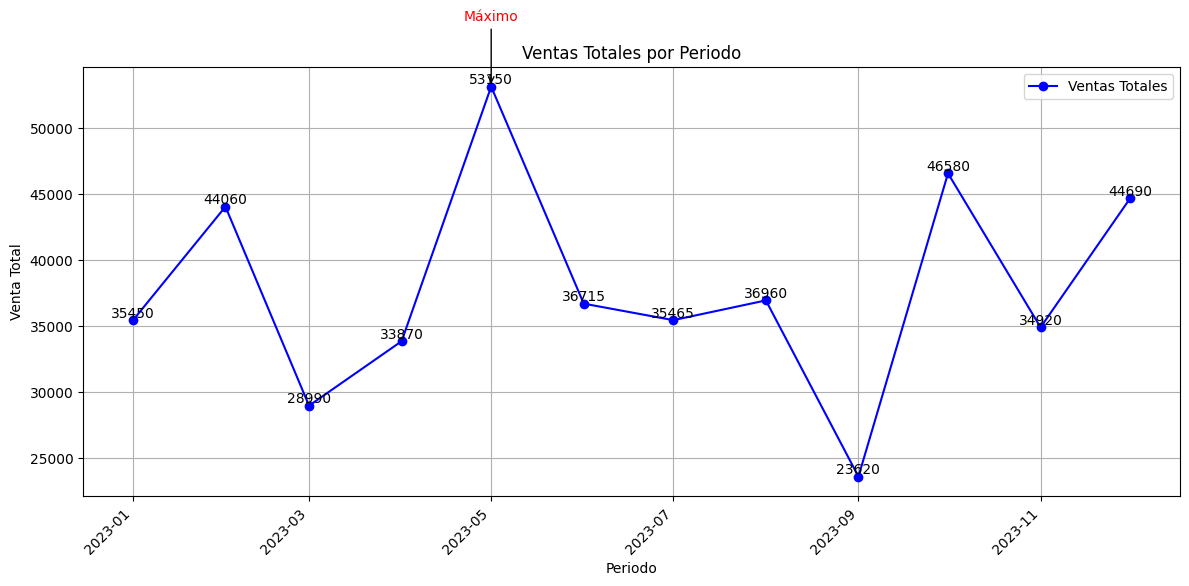

In [202]:
# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(periodo, venta_total, marker='o', color='blue', label="Ventas Totales")  # marker='o' añade puntos en cada dato

# Etiquetas de datos
for x, y in zip(periodo, venta_total):
    plt.text(x, y, str(y), fontsize=10, ha='center', va='bottom')  # Ajusta fontsize para el tamaño de las etiquetas

# Etiquetas de los ejes y título
plt.ylabel("Venta Total")
plt.xlabel("Periodo")
plt.title("Ventas Totales por Periodo")

# Rotar y ajustar etiquetas en el eje X
plt.xticks(rotation=45, ha='right')  # Rotación de 45 grados y alineación a la derecha

# Añadir cuadrícula
plt.grid(True)

# Añadir leyenda
plt.legend()

# Anotación para el valor máximo
max_index = np.argmax(venta_total)  # Obtener el índice del valor máximo
max_value = venta_total[max_index]
plt.annotate('Máximo', 
             xy=(periodo[max_index], max_value), 
             xytext=(periodo[max_index], max_value + 5000),  # Ajuste para separar más la etiqueta
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10, color='red', ha='center')

# Mostrar el gráfico
plt.tight_layout()  # Ajuste del layout
plt.show()

Le damos más forma al gráfcio de líneas porque se veía anteriormente un dato del ultimo mes que aún no estaba terminado, con esto vemos los datos limpios de los ultimos 12 meses y también cual fue el mes pico (mayo) como para entender que hicimos ese mes y poder replicarlo.